<a href="https://colab.research.google.com/github/tecktonik08/Team_Project02/blob/master/Semi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
!python -m pip install konlpy

In [82]:
import codecs

In [83]:
positive= []
nagative = []
posneg = []

In [84]:
pos = codecs.open("./positive_words_self.txt", 'r')
positive = pos.readlines()

In [85]:
positive = [pos.replace("\n","")for pos in positive]

In [86]:
neg= codecs.open("./negative_words_self.txt", 'r')
negative = neg.readlines()

In [87]:
negative = [neg.replace("\n","")for neg in negative]

In [88]:
import pandas as pd

In [89]:
df = pd.read_excel('./semi2.xls', names=['title', 'press', 'category', 'date', 'name','text','ratings'])
 

In [90]:
df

,title,press,category,date,name,text,ratings
0,중국에 대립각 세우는 리투아니아…왜?,경향신문,국제>중국 | 정치>외교 | 국제>유럽_EU,2021/08/11,박은하 기자 eunha999@kyunghyang.com,중국에서 6000km 떨어진 발트해 연안 국가 리투아니아가 ‘대만 문제’를 두고 중...,2
1,"국민의힘, 계속 옮겨붙는 갈등의 불씨...진화할 수 있을까",경향신문,정치>선거 | 정치>국회_정당,2021/08/11,유정인·박순봉 기자 jeongin@kyunghyang.com,국민의힘 내홍이 깊어지고 있다. 이준석 대표와 윤석열 전 검찰총장 등 ‘투스톤(준스...,3
2,"[단독] 법관이 직원에게 성경 공부·의전 지시, 법원에서도 ‘직장 갑질’ 논란",경향신문,국제>미국_북미 | 국제>유럽_EU | 사회>여성,2021/08/11,이혜리 기자 lhr@kyunghyang.com,법관에게 직장 내 갑질 및 괴롭힘을 당했다며 도움을 호소하는 법원 직원의 글이 법원...,4
3,"코로나 확진자수 2000명 돌파에 노심초사 여, 공세 강화하는 야",경향신문,정치>국회_정당 | 정치>청와대,2021/08/11,유설희 기자 sorry@kyunghyang.com,코로나19 신규 확진자가 11일 사상 처음으로 2000명을 돌파하자 여권은 ‘노심초...,5
4,"류호정 ""피해자 보호 못하는 강간죄 개정 위해 '쇼'라도 하겠다""",경향신문,정치>행정_자치 | 사회>여성 | 정치>국회_정당,2021/08/11,장은교 소통·젠더데스크 indi@kyunghyang.com,류호정 정의당 의원은 새로운 ‘쇼’를 궁리 중이라고 했다. 이번엔 강간죄 개정을 위...,-1
...,...,...,...,...,...,...,...
94,죽파리 자작나무 숲 인근 ‘송하리 졸참나무와 당숲’ 천연기념물 된다,경향신문,문화>학술_문화재 | 문화>미술_건축 | 지역>강원,2021/08/11,김종목 기자 jomo@kyunghyang.com,문화재청이 ‘영양 송하리 졸참나무와 당숲’을 국가지정문화재 천연기념물로 지정 예고했...,-1
95,"섬유·제지 산업도 탄소중립 움직임···""폐자원을 에너지로""",경향신문,경제>반도체 | 지역>강원 | 지역>충남,2021/08/11,강연주 기자 play@kyunghyang.com,정부가 섬유·제지 산업에서 탄소배출량을 줄이는 기술 개발에 투자를 강화한다.산업통상...,-2
96,현대차·BMW·벤츠 등 35개 차종 2만8946대 리콜,경향신문,경제>자동차 | IT_과학>인터넷_SNS | IT_과학>보안,2021/08/11,김희진 기자 hjin@kyunghyang.com,국토교통부는 현대자동차와 BMW 등 35개 차종 총 2만8946대에서 제작결함이 발...,-3
97,"박용진 ""4차 산업혁명 선도하는 '바이미식스' 대통령 되겠다""",경향신문,정치>국회_정당 | 정치>선거 | 정치>청와대,2021/08/11,탁지영 기자 g0g0@kyunghyang.com,더불어민주당 대선 경선 후보인 박용진 의원은 11일 “4차 산업혁명 대통령이 되겠다...,-4


In [91]:
df.head(5) # title, press, category, date, name, text

,title,press,category,date,name,text,ratings
0,중국에 대립각 세우는 리투아니아…왜?,경향신문,국제>중국 | 정치>외교 | 국제>유럽_EU,2021/08/11,박은하 기자 eunha999@kyunghyang.com,중국에서 6000km 떨어진 발트해 연안 국가 리투아니아가 ‘대만 문제’를 두고 중...,2
1,"국민의힘, 계속 옮겨붙는 갈등의 불씨...진화할 수 있을까",경향신문,정치>선거 | 정치>국회_정당,2021/08/11,유정인·박순봉 기자 jeongin@kyunghyang.com,국민의힘 내홍이 깊어지고 있다. 이준석 대표와 윤석열 전 검찰총장 등 ‘투스톤(준스...,3
2,"[단독] 법관이 직원에게 성경 공부·의전 지시, 법원에서도 ‘직장 갑질’ 논란",경향신문,국제>미국_북미 | 국제>유럽_EU | 사회>여성,2021/08/11,이혜리 기자 lhr@kyunghyang.com,법관에게 직장 내 갑질 및 괴롭힘을 당했다며 도움을 호소하는 법원 직원의 글이 법원...,4
3,"코로나 확진자수 2000명 돌파에 노심초사 여, 공세 강화하는 야",경향신문,정치>국회_정당 | 정치>청와대,2021/08/11,유설희 기자 sorry@kyunghyang.com,코로나19 신규 확진자가 11일 사상 처음으로 2000명을 돌파하자 여권은 ‘노심초...,5
4,"류호정 ""피해자 보호 못하는 강간죄 개정 위해 '쇼'라도 하겠다""",경향신문,정치>행정_자치 | 사회>여성 | 정치>국회_정당,2021/08/11,장은교 소통·젠더데스크 indi@kyunghyang.com,류호정 정의당 의원은 새로운 ‘쇼’를 궁리 중이라고 했다. 이번엔 강간죄 개정을 위...,-1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     99 non-null     object
 1   press     99 non-null     object
 2   category  99 non-null     object
 3   date      99 non-null     object
 4   name      99 non-null     object
 5   text      99 non-null     object
 6   ratings   99 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 5.5+ KB


In [93]:
df.shape

(99, 7)

In [94]:
df.columns

Index(['title', 'press', 'category', 'date', 'name', 'text', 'ratings'], dtype='object')

In [95]:
pd.DataFrame(df).iloc[1:]

,title,press,category,date,name,text,ratings
1,"국민의힘, 계속 옮겨붙는 갈등의 불씨...진화할 수 있을까",경향신문,정치>선거 | 정치>국회_정당,2021/08/11,유정인·박순봉 기자 jeongin@kyunghyang.com,국민의힘 내홍이 깊어지고 있다. 이준석 대표와 윤석열 전 검찰총장 등 ‘투스톤(준스...,3
2,"[단독] 법관이 직원에게 성경 공부·의전 지시, 법원에서도 ‘직장 갑질’ 논란",경향신문,국제>미국_북미 | 국제>유럽_EU | 사회>여성,2021/08/11,이혜리 기자 lhr@kyunghyang.com,법관에게 직장 내 갑질 및 괴롭힘을 당했다며 도움을 호소하는 법원 직원의 글이 법원...,4
3,"코로나 확진자수 2000명 돌파에 노심초사 여, 공세 강화하는 야",경향신문,정치>국회_정당 | 정치>청와대,2021/08/11,유설희 기자 sorry@kyunghyang.com,코로나19 신규 확진자가 11일 사상 처음으로 2000명을 돌파하자 여권은 ‘노심초...,5
4,"류호정 ""피해자 보호 못하는 강간죄 개정 위해 '쇼'라도 하겠다""",경향신문,정치>행정_자치 | 사회>여성 | 정치>국회_정당,2021/08/11,장은교 소통·젠더데스크 indi@kyunghyang.com,류호정 정의당 의원은 새로운 ‘쇼’를 궁리 중이라고 했다. 이번엔 강간죄 개정을 위...,-1
5,[뉴스분석]현실화된 정은경의 예언···확진자 2223명이 정점은 아니다,경향신문,사회>의료_건강,2021/08/11,노도현·김향미·이혜리 기자 hyunee@kyunghyang.com,코로나19 하루 신규 확진자가 2200명을 넘어서며 새로운 국면을 맞고 있다. 20...,-2
...,...,...,...,...,...,...,...
94,죽파리 자작나무 숲 인근 ‘송하리 졸참나무와 당숲’ 천연기념물 된다,경향신문,문화>학술_문화재 | 문화>미술_건축 | 지역>강원,2021/08/11,김종목 기자 jomo@kyunghyang.com,문화재청이 ‘영양 송하리 졸참나무와 당숲’을 국가지정문화재 천연기념물로 지정 예고했...,-1
95,"섬유·제지 산업도 탄소중립 움직임···""폐자원을 에너지로""",경향신문,경제>반도체 | 지역>강원 | 지역>충남,2021/08/11,강연주 기자 play@kyunghyang.com,정부가 섬유·제지 산업에서 탄소배출량을 줄이는 기술 개발에 투자를 강화한다.산업통상...,-2
96,현대차·BMW·벤츠 등 35개 차종 2만8946대 리콜,경향신문,경제>자동차 | IT_과학>인터넷_SNS | IT_과학>보안,2021/08/11,김희진 기자 hjin@kyunghyang.com,국토교통부는 현대자동차와 BMW 등 35개 차종 총 2만8946대에서 제작결함이 발...,-3
97,"박용진 ""4차 산업혁명 선도하는 '바이미식스' 대통령 되겠다""",경향신문,정치>국회_정당 | 정치>선거 | 정치>청와대,2021/08/11,탁지영 기자 g0g0@kyunghyang.com,더불어민주당 대선 경선 후보인 박용진 의원은 11일 “4차 산업혁명 대통령이 되겠다...,-4


In [96]:
df.drop_duplicates(subset=None,inplace=True)  # 중복데이터 삭제 inplace=True:메서드가 적용되는 원본데이터를 변경할지 여부를 결정 

In [97]:
len(df)

99

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_data = df['text']
y_data = df['ratings']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((74,), (74,), (25,), (25,))

# NLP(토큰화)

In [101]:
type(x_train)


pandas.core.series.Series

In [102]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','') #[a-zA-Z]] 불용어 처리전 한글만 가져오게 함

48    서울시가 간호사 사회복지사 직업상담사 사서 등 자격증을 보유한 경력단절 여성을 대상...
41    기후 변화에 따른 기온 상승으로 전 세계 식량 공급이 어려워질 것이라는 어두운 전망...
94    문화재청이 영양 송하리 졸참나무와 당숲을 국가지정문화재 천연기념물로 지정 예고했다졸...
75    중소벤처기업들이 공동으로 사용할 수 있는 화상 회의실이 문을 연다중소벤처기업부중기부...
49    계곡이나 하천 등지에서 무허가 영업을 하거나 자릿세를 요구하는 등 위법행위를 할 경...
                            ...                        
6     일 기준으로 대 국회에는 건의 법안이 계류돼 있다 하루에만 수십 건의 법안이 발의되...
55    파리바게뜨 제빵사들의 민주노총 탈퇴를 종용한 이 회사 현장관리자들이 노조 와해 공작...
28    홍남기 부총리 겸 기획재정부 장관이 박범계 법무부 장관에게 이재용 삼성전자 부회장의...
84    대권도전에 나선 원희룡 제주도지사가 일 민선 기 제주도 지사직 업무를 마무리했다제주...
17    코로나 백신 접종률이 높은 영국과 싱가포르에서 코로나와 함께 살기 실험이 이뤄지고 ...
Name: text, Length: 74, dtype: object

In [103]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  30142      0 --:--:-- --:--:-- --:--:-- 30142


In [104]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [105]:
from konlpy.tag import Mecab

In [106]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.'))   #형태소 분석

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [107]:
sentance = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']


In [ ]:
for tok in x_train :
  encoded = mecab.morphs(tok)
  sentance.append([item for item in encoded if item not in stopwords])

sentance  

# Tokenizer


In [109]:
print(sentance)

[['서울시', '간호사', ',', '사회', '복지', '사', ',', '직업', '상', '담사', ',', '사서', '등', '자격증', '보유', '‘', '경력', '단절', '여성', '’', '대상', '으로', '시', '산하', '기관', '인턴', '십', '채용', '연계', '사업', '시작', '한다', '.', '서울시', '11', '일', '“', '전문', '자격증', '장롱면허', '로', '묵혔', '던', '여성', '다시', '자신감', '갖', '사회', '진출', '할', '수', '있', '도록', '‘', '서울', '우먼', '업', '(', 'Woman', 'Up', ')', '인턴', '십', '’', '프로그램', '시작', '한다', '”', '라고', '밝혔', '.', '‘', '우먼', '업', '’', '서울시', '여성', '인력', '개발', '기관', '(', '여성', '능력', '개발', '원', ',', '여성', '발전', '센터', ',', '여성', '인력', '개발', '센터', ')', '통칭', '이름', '.', '1', '기', '우먼', '업', '인턴', '십', '에선', '경력', '단절', '여성', '62', '명', '선정', '해', '직업', '교육', '현장', '실습', '주선', '한다', '.', '서울시', ',', '투자', '출연', '기관', ',', '민간', '위탁', '기관', ',', '여성', '인력', '개발', '기관', '등', '44', '개', '기관', '참여', '인턴', '십', '보건', '의료', ',', '상담', ',', '교육', '·', '보육', ',', '행정', ',', '사', '서', '·', '학예', '·', '전산', '등', '5', '개', '분야', '로', '구성', '된다', '.', '간호사', ',', '사회', '복지', '사', ',', '직업', '상', '담사', ',', 

In [110]:
import tensorflow as tf

In [111]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentance)  

In [ ]:
tokenizer.word_index  #사전이 만들어짐

In [ ]:
tokenizer.word_counts  # 전체문장에서 몇번 반복되었는지 확인

In [114]:
total_cnt = len(tokenizer.word_index) 

In [115]:
rare_cnt = 0          
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value  # 전체 단어 수
  if(value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value     # 2 미만인 단어의 수

In [116]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100    

(5875, 3799, 64.66382978723404, 13.771044750079964)

In [117]:
vocab_size = total_cnt - rare_cnt

In [118]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')  # 토큰화 되어있지 않은 단어들을 특수한 값으로 처리
tokenizer.fit_on_texts(sentance)

In [ ]:
tokenizer.index_word  # 숫자로 만듬

In [120]:
x_train = tokenizer.texts_to_sequences(sentance)

In [121]:
print(x_train[0:3]) 

[[463, 1, 4, 202, 389, 203, 4, 1605, 194, 1606, 4, 1, 19, 1607, 1, 14, 937, 1310, 47, 16, 572, 8, 65, 1, 150, 285, 938, 1311, 1, 464, 302, 36, 2, 463, 52, 12, 5, 723, 1607, 1, 10, 1, 82, 47, 286, 1, 1105, 202, 1608, 22, 18, 7, 88, 14, 123, 1609, 1106, 13, 1, 1, 15, 285, 938, 16, 1312, 302, 36, 6, 34, 58, 2, 14, 1609, 1106, 16, 463, 47, 1107, 151, 150, 13, 47, 939, 151, 45, 4, 47, 229, 246, 4, 47, 1107, 151, 246, 15, 1, 1313, 2, 31, 25, 1609, 1106, 285, 938, 636, 937, 1310, 47, 1, 27, 247, 21, 1605, 512, 513, 1610, 1, 36, 2, 463, 4, 303, 1314, 150, 4, 1108, 1109, 150, 4, 47, 1107, 151, 150, 19, 1611, 81, 150, 390, 285, 938, 1315, 117, 4, 821, 4, 512, 20, 1, 4, 1612, 4, 203, 180, 20, 1, 20, 1, 19, 83, 81, 465, 10, 181, 118, 2, 1, 4, 202, 389, 203, 4, 1605, 194, 1606, 4, 1, 1, 4, 89, 1, 355, 4, 1, 4, 203, 180, 4, 1, 1613, 4, 1, 19, 116, 81, 465, 1607, 1, 572, 8, 36, 2, 287, 1614, 390, 150, 19, 1316, 230, 463, 47, 939, 151, 45, 1317, 13, 1318, 2, 1, 2, 1, 2, 940, 15, 9, 176, 22, 18, 7, 2, 

In [122]:
len(x_train[0]), len(x_train[40]), len(x_train[50])

(261, 575, 511)

In [123]:
hist_len = [len(words) for words in x_train]

In [124]:
import matplotlib.pyplot as plt

(array([5., 0., 1., 4., 3., 9., 5., 7., 4., 6., 7., 4., 3., 5., 2., 3., 1.,
        1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  44.  ,   87.24,  130.48,  173.72,  216.96,  260.2 ,  303.44,
         346.68,  389.92,  433.16,  476.4 ,  519.64,  562.88,  606.12,
         649.36,  692.6 ,  735.84,  779.08,  822.32,  865.56,  908.8 ,
         952.04,  995.28, 1038.52, 1081.76, 1125.  , 1168.24, 1211.48,
        1254.72, 1297.96, 1341.2 , 1384.44, 1427.68, 1470.92, 1514.16,
        1557.4 , 1600.64, 1643.88, 1687.12, 1730.36, 1773.6 , 1816.84,
        1860.08, 1903.32, 1946.56, 1989.8 , 2033.04, 2076.28, 2119.52,
        2162.76, 2206.  ]),
 <a list of 50 Patch objects>)

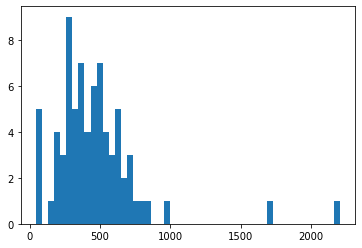

In [125]:
plt.hist(hist_len, bins=50)

In [126]:
sum(hist_len)/len(x_train)

464.7432432432432

In [127]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=50)

In [128]:
y_train

48   -5
41    3
94   -1
75   -2
49    1
     ..
6    -3
55   -2
28   -5
84   -1
17   -4
Name: ratings, Length: 74, dtype: int64

In [129]:
import numpy as np

In [130]:
np.unique(y_train)

array([-5, -4, -3, -2, -1,  1,  2,  3,  4,  5])

In [131]:
len(x_train),len(y_train)

(74, 74)

# make model

In [133]:
model = tf.keras.models.Sequential()

In [134]:
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=50)) 

In [135]:
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))

In [138]:
model.add(tf.keras.layers.Dense(5,activation='softmax')) 

In [139]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) 

In [141]:
model.fit(x_train, y_train, epochs=3, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/3


InvalidArgumentError: ignored